<a href="https://colab.research.google.com/github/xraydog999/conda-xray/blob/main/Copy_of_UserInput_Molecular_Properties_rdkit_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Molecular Descriptors from rdkit

In RDKit, "Crippen" refers to the Wildman-Crippen model, a widely used method for estimating a molecule's lipophilicity (logP) and molar refractivity (MR). This atom-contribution method assigns specific numerical values to different atom types and patterns within a molecule to calculate these physicochemical properties, which are crucial for predicting drug-like properties and behavior.

In RDKit, rdkit.Chem.MolSurf is a module that contains functions for calculating approximate molecular surface area (VSA) descriptors, similar to those found in the MOE software. These functions compute and expose various VSA properties, such as the Labute ASA and PEOE_VSA descriptors, which can be used to describe molecular properties related to surface area and electrostatics.

In RDKit, "Lipinski" refers to the Lipinski's Rule of Five (Ro5), a set of guidelines used to assess if a chemical compound is likely to be orally active and have good bioavailability. The RDKit library provides the rdkit.Chem.Lipinski module and related functions to calculate the specific molecular properties (such as molecular weight, LogP, hydrogen bond donors, and acceptors) required by Lipinski's rules.

rdMolDescriptors is a module within RDKit's Chem library that provides functions for calculating various molecular descriptors. Molecular descriptors are numerical values that represent the chemical and physical properties of a molecule, and they are widely used in cheminformatics, drug discovery, and materials science for tasks such as quantitative structure-activity relationships (QSAR), virtual screening, and similarity analysis.
Key aspects of rdMolDescriptors:
Calculation of diverse descriptors:
It includes functions to calculate a wide range of descriptors, such as:
Constitutional descriptors: e.g., molecular weight, number of atoms, number of bonds.
Topological descriptors: e.g., topological polar surface area (TPSA), Balaban J index.
Pharmacophore descriptors: e.g., number of hydrogen bond donors/acceptors.
Spatial descriptors: e.g., molecular volume, surface area (like LabuteASA).
LogP and MR descriptors: e.g., CrippenLogP, CrippenMR.

Use terminal to enter smiles string. Program has "secret string"

Enter SMILES string: CCCN
SMILES: CCCN
Structure: 
     RDKit          2D

  4  3  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.8971    0.7500    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
M  END

Atom Count: 4
Chemical Formula: C3H9N
Molecular Weight: 59.11199999999999
Heavy Atom Count: 4
Number of Bonds: 3
LogP: 0.3551000000000001
Number of Aromatic Rings: 0
Number of Rings: 0
Molar Refractivity: 19.345400000000005
H-Bond Donors: 1
H-Bond Acceptors: 1
Rotatable Bonds: 1
Formal Charge: 0


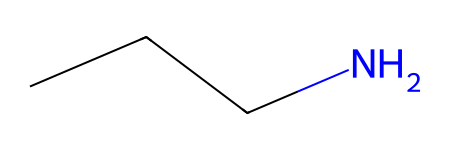

In [8]:
! pip install rdkit
# !conda install -c conda-forge rdkit -y
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Crippen
from rdkit.Chem import MolSurf
from rdkit.Chem import Lipinski
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem.Draw import IPythonConsole
from rdkit import Chem

# from google.colab import userdata # Import userdata for user input

def calculate_molecular_descriptors(smiles_string):
    """
    Calculates various molecular descriptors from a SMILES string.

    Args:
        smiles_string (str): The SMILES string of the molecule.

    Returns:
        dict: A dictionary containing the calculated molecular descriptors,
              or None if the SMILES string is invalid.
    """
    mol = Chem.MolFromSmiles(smiles_string)

    if mol is None:
        return None

    descriptors = {}
    descriptors['SMILES'] = smiles_string
    descriptors['Structure'] = Chem.MolToMolBlock(mol)  # Get the mol block representation
    descriptors['Atom Count'] = mol.GetNumAtoms()
    descriptors['Chemical Formula'] = rdMolDescriptors.CalcMolFormula(mol)
    descriptors['Molecular Weight'] = Descriptors.MolWt(mol)
    descriptors['Heavy Atom Count'] = mol.GetNumHeavyAtoms()
    descriptors['Number of Bonds'] = mol.GetNumBonds()
    descriptors['LogP'] = Crippen.MolLogP(mol)
    descriptors['Number of Aromatic Rings'] = Descriptors.NumAromaticRings(mol)
    descriptors['Number of Rings'] = mol.GetRingInfo().NumRings()
    # pKa calculation is more complex and requires specialized tools,
    # so it's not included in this basic example.
    # descriptors['pKa'] = ...
    descriptors['Molar Refractivity'] = Crippen.MolMR(mol)
    # descriptors['Polar Surface Area'] = TPSA(mol)
    descriptors['H-Bond Donors'] = Lipinski.NumHDonors(mol)
    descriptors['H-Bond Acceptors'] = Lipinski.NumHAcceptors(mol)
    descriptors['Rotatable Bonds'] = Descriptors.NumRotatableBonds(mol)
    descriptors['Formal Charge'] = Chem.GetFormalCharge(mol)

    return descriptors

def draw_molecule(smiles_string):
    """
    Draws the molecular structure from a SMILES string.

    Args:
        smiles_string (str): The SMILES string of the molecule.

    Returns:
        img: An image object of the molecule, or None if the SMILES string is invalid.
    """
    mol = Chem.MolFromSmiles(smiles_string)
    if mol is None:
        return None
    return mol

# Get SMILES input from the user
smiles = input("Enter SMILES string: ")

mol_descriptors = calculate_molecular_descriptors(smiles)
molecule_drawing = draw_molecule(smiles)

if mol_descriptors:
    for key, value in mol_descriptors.items():
        print(f"{key}: {value}")
else:
    print(f"Invalid SMILES string: {smiles}")

if molecule_drawing:
    display(molecule_drawing)
else:
    print(f"Could not draw molecule for SMILES string: {smiles}")